# Perceptron Demo

In [52]:
#%pip install palmerpenguins

import sys
sys.path.append("../src")

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from rice_ml.perceptron import Perceptron

print(Perceptron.__module__)

sns.set_theme()

rice_ml.perceptron


### Loading and preparing the dataset

In [53]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Now we have an understanding of the Penguins dataset. Each row is an observation of a penguin, as long as some characteristics of that penguin: this includes information about its species, sex, bill legnth, flipper length, etc.

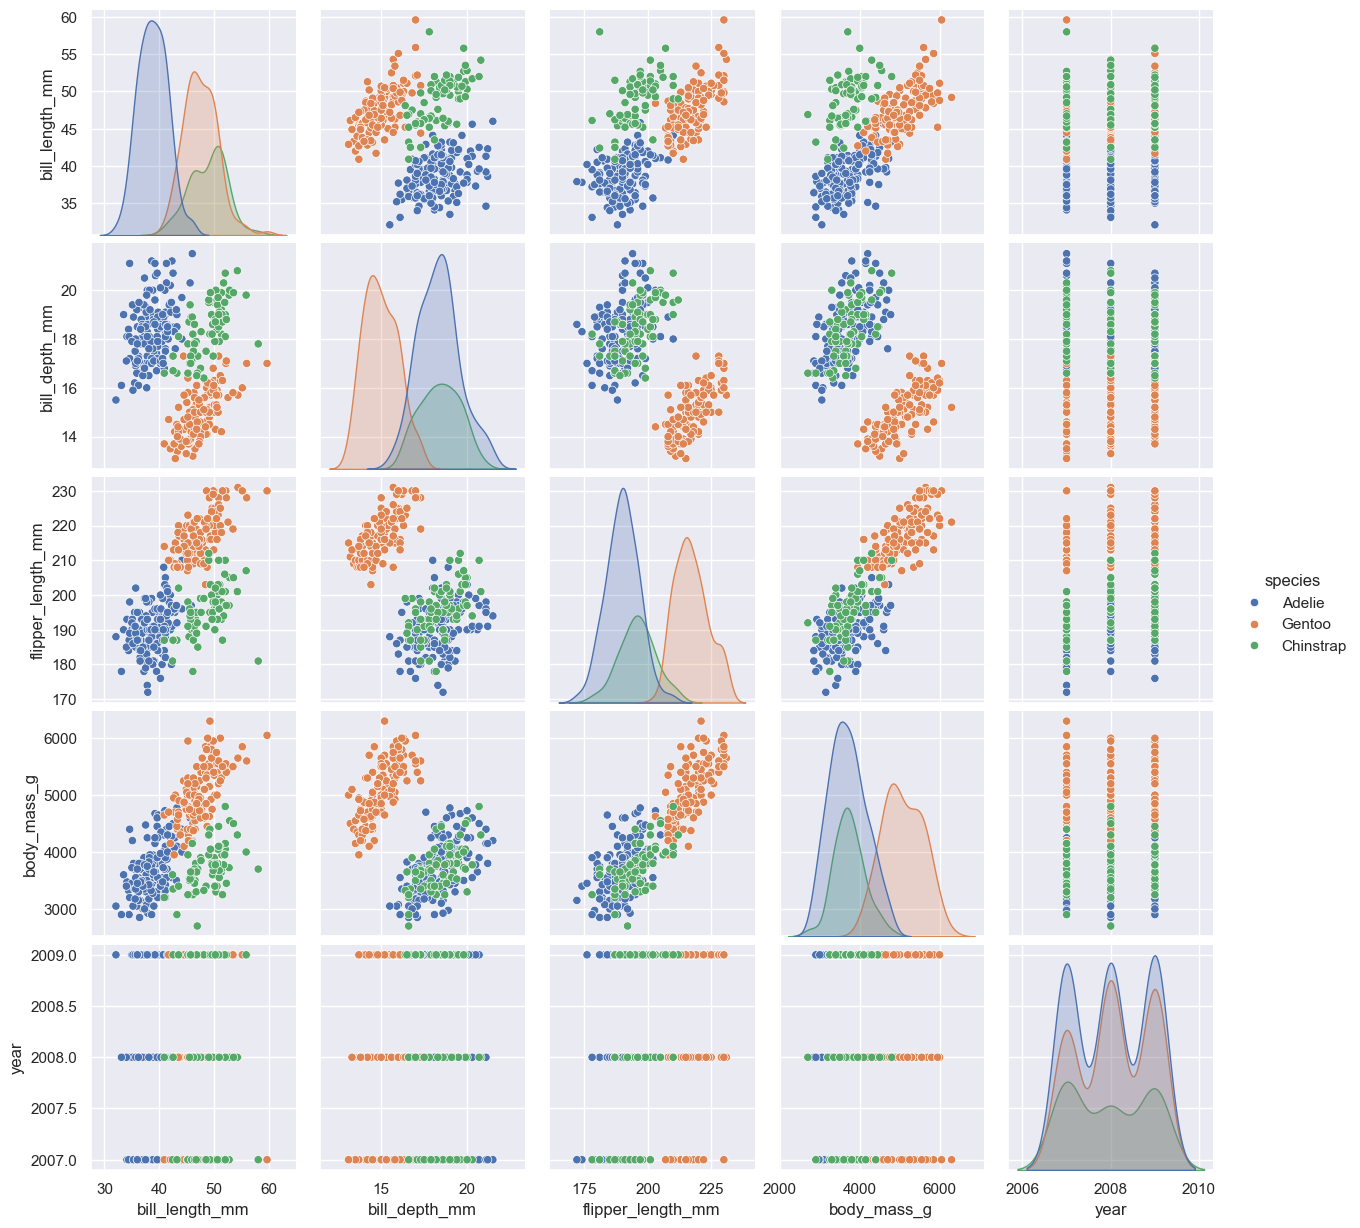

In [54]:
sns.pairplot(penguins, hue="species", diag_kind="kde")
plt.show()

As the perceptron is binary, let us consider only the Adelie and Gentoo species of penguins.

We can use this pairplot to understand what variables might be indicative of the species of penguin. We can see that the two species are separated distinctly according to bill length, as well as flipper length. Thus, we can use bill length and flipper length as the predictive variables in our perceptron.

In [55]:
# Preparing the data to include only the variables we are interested in

sliced_penguins = penguins[['bill_length_mm', 'flipper_length_mm', 'species']].dropna()
penguins_fltr = sliced_penguins[sliced_penguins['species'] != 'Chinstrap']\

print(penguins_fltr)

# Confirm we are only including Adelie and Gentoo penguins
print(penguins_fltr["species"].unique())

penguins_ready = penguins_fltr.copy()
penguins_ready["x"] = penguins_ready.apply(
    lambda row: np.array([row["bill_length_mm"], row["flipper_length_mm"]]),
    axis=1
)

penguins_ready.rename(columns={"species": "y"}, inplace=True)
penguins_ready = penguins_ready[["x", "y"]]

print(penguins_ready)

     bill_length_mm  flipper_length_mm species
0              39.1              181.0  Adelie
1              39.5              186.0  Adelie
2              40.3              195.0  Adelie
4              36.7              193.0  Adelie
5              39.3              190.0  Adelie
..              ...                ...     ...
270            47.2              214.0  Gentoo
272            46.8              215.0  Gentoo
273            50.4              222.0  Gentoo
274            45.2              212.0  Gentoo
275            49.9              213.0  Gentoo

[274 rows x 3 columns]
['Adelie' 'Gentoo']
                 x       y
0    [39.1, 181.0]  Adelie
1    [39.5, 186.0]  Adelie
2    [40.3, 195.0]  Adelie
4    [36.7, 193.0]  Adelie
5    [39.3, 190.0]  Adelie
..             ...     ...
270  [47.2, 214.0]  Gentoo
272  [46.8, 215.0]  Gentoo
273  [50.4, 222.0]  Gentoo
274  [45.2, 212.0]  Gentoo
275  [49.9, 213.0]  Gentoo

[274 rows x 2 columns]


### Training

Now that our data is ready for the input-specifications of our class, we are ready to train our perceptron. The weights and the bias term are initially randomly generated. They are then adjusted with each misclassification so that the seperation boundary is pushed towards correct classifications.

In [62]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_df, test_df = train_test_split(penguins_ready, test_size=0.2, random_state=12, stratify=penguins_ready["y"])

# Adjusting for different scales of variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
Xtr = sc.fit_transform(np.vstack(train_df["x"]))
Xte = sc.transform(np.vstack(test_df["x"]))
train_df = train_df.copy()
test_df = test_df.copy()
train_df["x"] = list(Xtr)
test_df["x"] = list(Xte)


p = Perceptron(learning_rate=0.01, iterations=150)
p.train(train_df)

print("Weights:", p.w_)
print("Bias:", p.b_)

Weights: [0.00772951 0.02735272]
Bias: -0.01


### Prediction

With these weights and bias term derived from the training phase, we can predict what species an observation will be based on its vector of bill and flipper length.

The below equation represents the decision boundary of the perceptron. Adelie and Gentoo are assigned to -1 and 1 respectively. Thus, if f(x) is negative, our perceptron predicts that the observation is Adelie and if f(x) is postive, our perceptron predicts that the observation is Gentoo.

f(x) = w_1 * x_1 + w_2 * x_2 + b


In [65]:
train_acc = p.score(train_df)
test_acc  = p.score(test_df)

print(f"Train accuracy: {train_acc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}")

train_loss = p.loss(train_df)
test_loss  = p.loss(test_df)

print(f"Number of mistakes in training: {train_loss:.4f}")
print(f"Number of mistakes in testing:  {test_loss:.4f}")

Train accuracy: 1.0000
Test accuracy:  0.9818
Number of mistakes in training: 0.0000
Number of mistakes in testing:  1.0000


Note that the train accuracy is 1 while the test accuracy is slightly lower. Although the perceptron is trained to be completely accurate with its training data, it may fail to correctly identify some edge observations in the testing data. This is to be expected, and we separate the training and testing data for this very purpose: testing our perceptron on the training data will often inflate the accuracy of the binary classification.

In [66]:
sample_preds = test_df.copy()
sample_preds["y_pred"] = p.predict(test_df)
sample_preds.head()

,x,y,y_pred
257,"[0.8153006632488368, 0.8604734551823691]",Gentoo,Gentoo
178,"[0.36431565986816195, 0.9270613303360578]",Gentoo,Gentoo
83,"[-1.4788404409050326, -0.6044597981987817]",Adelie,Adelie
195,"[1.3643258847557467, 0.9270613303360578]",Gentoo,Gentoo
172,"[1.4819741465072276, 1.0602370806434351]",Gentoo,Gentoo


The above code gives us some specific instances of prediction from our test dataset. We can see the scaled bill length and flipper length, which we earlier concluded to be predictive of the species of the penguin. 

For the subset of observations we listed here, we can see that our perceptron has 100% accuracy in classifying the penguin species. In the entire test set, we had 1 mistake for an accuracy of approximately 98%.